/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 16000 samples, validate on 4000 samples
Epoch 1/300
16000/16000 [==============================] - 4s 240us/step - loss: 2.2979 - acc: 0.1710 - val_loss: 2.2891 - val_acc: 0.2542
Epoch 2/300
16000/16000 [==============================] - 1s 86us/step - loss: 2.2806 - acc: 0.2674 - val_loss: 2.2627 - val_acc: 0.3083
Epoch 3/300
16000/16000 [==============================] - 1s 86us/step - loss: 2.2409 - acc: 0.3297 - val_loss: 2.1916 - val_acc: 0.3535
Epoch 4/300
16000/16000 [==============================] - 1s 87us/step - loss: 2.1434 - acc: 0.3165 - val_loss: 2.0630 - val_acc: 0.2880
Epoch 5/300
16000/16000 [==============================] - 1s 86us/step - loss: 2.0107 - acc: 0.3022 - val_loss: 1.9113 - val_acc: 0.3480
Epoch 6/300
16000/16000 [==============================] - 1s 86us/step - loss: 1.8420 - acc: 0.3949 - val_loss: 1.7478 - val_acc: 0.4423
Epoch 7/300
16000/16000 [==============================] - 1s 86us/step - loss: 1.6692 - acc: 0.4455 - val_loss: 1.5748 - 

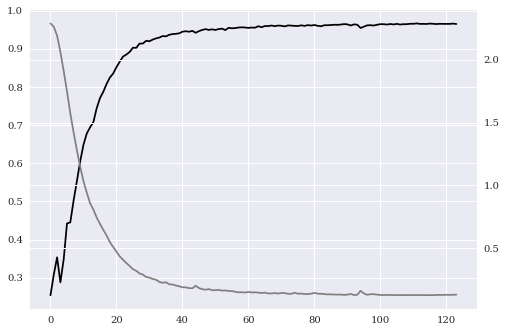

10000/10000 [==============================] - 15s 2ms/step
[0.11631862216508015, 0.9677]


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

np.random.seed(0)

'''
データの生成
'''
# x_train: (60000, 284, 284), y_tarin: (60000, 10)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

n = len(x_train[:,0])
N  = 30000
N_train = 20000
N_validation = 4000
indices = np.random.permutation(range(n))[:N]   # ランダムにN枚

# X = mnist.data[indices]
X = x_train.reshape(n, 784)[indices]
X = X/255.0
X = X -X.mean(axis= 1).reshape(len(X), 1)
X = X.reshape(len(X), 28, 28)   # 時系列データに変換
Y = keras.utils.to_categorical(y_train, 10)[indices]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=N_train)

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=N_validation)

"""
モデル設定
"""
n_in = 28
n_time = 28
n_hidden = 128
n_out = 10

def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)

early_stopping = EarlyStopping(monitor= "val_loss", patience= 10, verbose= 1)

model = Sequential()
model.add(Bidirectional(LSTM(n_hidden), input_shape= (n_time, n_in)))
model.add(Dense(n_out, kernel_initializer= weight_variable))
model.add(Activation("softmax"))

model.compile(  loss= "categorical_crossentropy",
                optimizer= Adam(lr= 0.001, beta_1= 0.9, beta_2= 0.999),
                metrics= ["accuracy"])

"""
モデル学習
"""
epochs = 300
batch_size = 4000
hist = model.fit(   X_train, Y_train,
                    batch_size= batch_size,
                    epochs= epochs,
                    validation_data= (X_validation, Y_validation),
                    callbacks= [early_stopping])

"""
学習の進み具合を可視化
"""
acc = hist.history["val_acc"]
loss = hist.history["val_loss"]
plt.rc('font', family='serif')
fig = plt.figure()
ax_acc = fig.add_subplot(111)
ax_acc.plot(range(len(acc)), acc, label='loss', color='black')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(len(loss)), loss, label='acc', color='gray')
plt.xlabel('epochs')
plt.show()

'''
予測精度の評価
'''
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)